In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import time
%matplotlib inline
from scipy import integrate, optimize
from scipy.integrate import odeint
from scipy.optimize import curve_fit

import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence
from ndlib.viz.bokeh.MultiPlot import MultiPlot


## Data Acquisition 

In [2]:
# Downloaded dataset from kaggale and palced in our local repositry
# URL of the Dataset
#Source Dataset link: https://www.kaggle.com/headsortails/covid19-tracking-germany?select=covid_de.csv'




In [3]:
pwd

'/Users/junaidfahad/Downloads/Masters/Summer2020/Data Science Lab/Lec/dslsose2020team04/src'

## Data Preprocessing

In [4]:
# Read the file from current directory and Load into Dataframe
dataframe = pd.read_csv("/Users/junaidfahad/Downloads/Masters/Summer2020/Data Science Lab/Lec/dslsose2020team04/data/covid_de.csv")

total_cases = dataframe["cases"].sum()
total_deaths = dataframe["deaths"].sum()
total_recovered = dataframe["recovered"].sum()

print(total_cases, total_deaths, total_recovered)

#Summing based on date

before_distancing = dataframe.loc[dataframe['date'] <= '2020-03-20', ['cases','deaths','recovered']].sum()
after_distancing = dataframe.loc[dataframe['date'] > '2020-03-20', ['cases','deaths','recovered']].sum()


df_before = pd.DataFrame(before_distancing, columns = ['before-20'])
df_after = pd.DataFrame(after_distancing, columns = ['after-20'])
df = pd.concat([df_before, df_after], axis=1)



#Summing based on date groupby

# groupby_sum = dataframe.groupby(['date'])['cases','deaths','recovered'].sum()

# g = dataframe.groupby('date')
# output = g.apply(lambda x: x[x['date'] <= '2020-03-20']['cases', 'deaths', 'recovered'].sum())
# print(output)



#Before intervention

before_intervention = dataframe.loc[dataframe['date'] <= '2020-03-20', ['date', 'cases','deaths','recovered']]
before_intervention_groupby = before_intervention.groupby(['date'])['cases','deaths','recovered'].sum()

writer_before_intervention = pd.ExcelWriter('DSLPreprocessing_by_date_sum_before.xlsx', engine='xlsxwriter')
before_intervention_groupby.to_excel(writer_before_intervention, sheet_name='Sheet1')
# Output write in Excls file
writer_before_intervention.save()

#After intervention

after_intervention = dataframe.loc[dataframe['date'] > '2020-03-20', ['date', 'cases','deaths','recovered']]
after_intervention_groupby = after_intervention.groupby(['date'])['cases','deaths','recovered'].sum()

writer_after_intervention = pd.ExcelWriter('DSLPreprocessing_by_date_sum_after.xlsx', engine='xlsxwriter')
after_intervention_groupby.to_excel(writer_after_intervention, sheet_name='Sheet1')

# Output write in Excls file
writer_after_intervention.save()


178085 8245 160274


/Users/junaidfahad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/Users/junaidfahad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [5]:
# The results are Before intervention SIR parameter's sumed values date wise,  by considering the dates before lockdown had imposed.
before_intervention_groupby

,cases,deaths,recovered
date,,,
2020-01-28,4,0,4
2020-01-29,2,0,2
2020-01-31,3,0,3
2020-02-03,1,0,1
2020-02-04,5,0,5
2020-02-06,1,0,1
2020-02-07,1,0,1
2020-02-11,3,0,3
2020-02-12,2,0,2


In [6]:
# The results are After intervention SIR Parameter's sumed values,  by considering the dates after lockdown had imposed
after_intervention_groupby

,cases,deaths,recovered
date,,,
2020-03-21,3338,92,3246
2020-03-22,2281,74,2207
2020-03-23,3718,123,3595
2020-03-24,4861,162,4698
2020-03-25,5703,211,5492
...,...,...,...
2020-05-18,528,5,27
2020-05-19,726,6,28
2020-05-20,785,11,30


## Data Visualiazation 

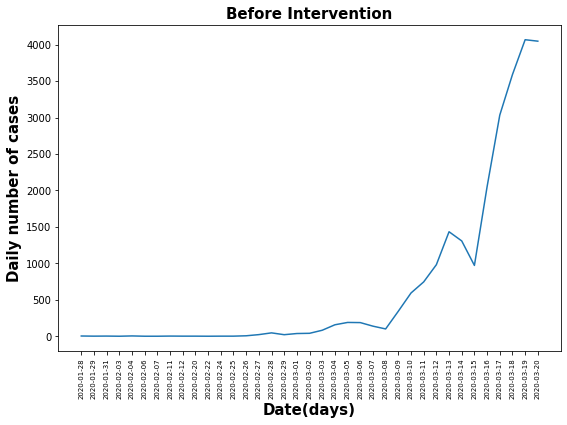

In [7]:
#Visualiaze the data from extracted file covid_de.csv
#Visualiaztion for daily number of cases Cases with respect to date(before intevention)
# Set directory

df = pd.read_excel('DSLPreprocessing_by_date_sum_before.xlsx')

#Set Plot

plt.figure(figsize=(9,6))
plt.plot(df['date'], df['cases'])
plt.xticks(df['date'], rotation=90, size = 7)

#Set Label

plt.xlabel('Date(days)',fontdict={'fontweight':'bold', 'fontsize':15})
plt.ylabel('Daily number of cases',fontdict={'fontweight':'bold', 'fontsize':15})
plt.title('Before Intervention',fontdict={'fontweight':'bold', 'fontsize':15})
plt.show()

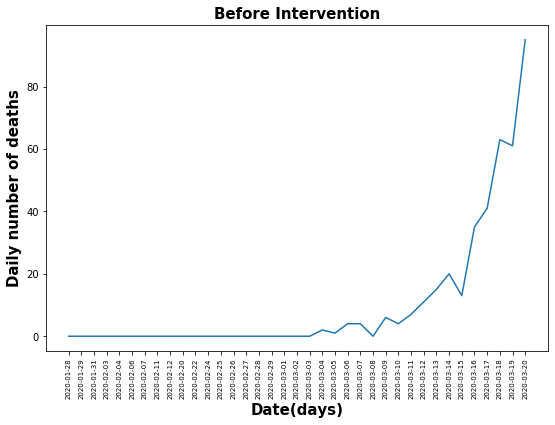

In [8]:
# Visuliaztion for daily number of  deaths with respect to date(before intevention)
# Set directory
df = pd.read_excel('DSLPreprocessing_by_date_sum_before.xlsx')
# Set Plot
plt.figure(figsize=(9,6))
plt.plot(df['date'], df['deaths'])
plt.xticks(df['date'], rotation=90, size = 7)
# Set Label
plt.xlabel('Date(days)',fontdict={'fontweight':'bold', 'fontsize':15})
plt.ylabel('Daily number of deaths',fontdict={'fontweight':'bold', 'fontsize':15})
plt.title('Before Intervention',fontdict={'fontweight':'bold', 'fontsize':15})
plt.show()

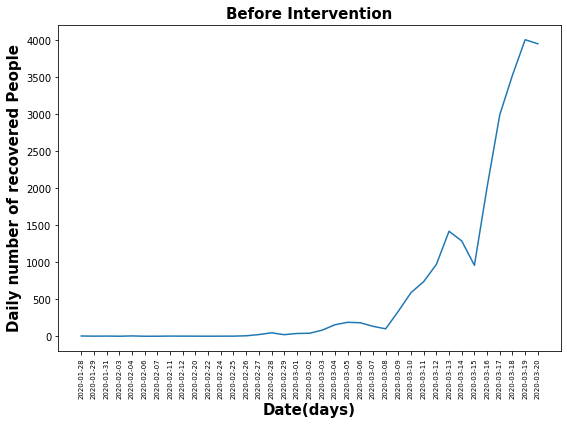

In [9]:
# Visuliaztion for daily number of recovered people with respect to date(before intevention)
# Set directory
df = pd.read_excel('DSLPreprocessing_by_date_sum_before.xlsx')
# Set Plot
plt.figure(figsize=(9,6))
plt.plot(df['date'], df['recovered'])
plt.xticks(df['date'], rotation=90, size = 7)
# Set label
plt.xlabel('Date(days)',fontdict={'fontweight':'bold', 'fontsize':15})
plt.ylabel('Daily number of recovered People',fontdict={'fontweight':'bold', 'fontsize':15})
plt.title('Before Intervention',fontdict={'fontweight':'bold', 'fontsize':15})
plt.show()

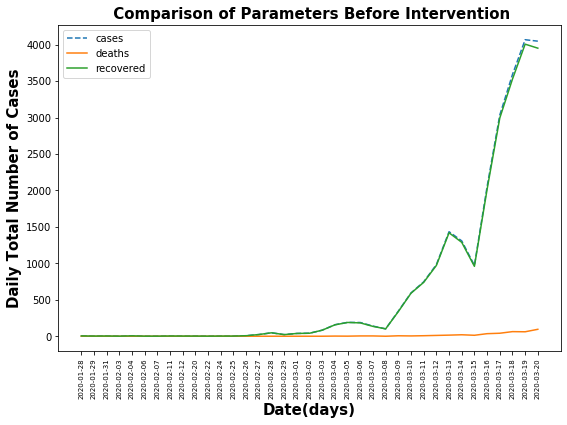

In [10]:
# Visuliaztion  for daily Total Number cases varying with respect to date(before intevention)
#  Read and load the before_data intervention file

df = pd.read_excel('DSLPreprocessing_by_date_sum_before.xlsx')

# Plot the covid19 SIR model Parameters vs date
plt.figure(figsize=(9,6))
plt.plot(df['date'], df['cases'], label = 'cases', ls = '--')
plt.plot(df['date'], df['deaths'],label = 'deaths')
plt.plot(df['date'], df['recovered'], label = 'recovered' )
plt.xticks(df['date'], rotation=90, size = 7)
# set label for x,y axis
plt.xlabel('Date(days)',fontdict={'fontweight':'bold', 'fontsize':15})
plt.ylabel('Daily Total Number of Cases',fontdict={'fontweight':'bold', 'fontsize':15})
plt.title(' Comparison of Parameters Before Intervention',fontdict={'fontweight':'bold', 'fontsize':15})
plt.legend()
plt.show()

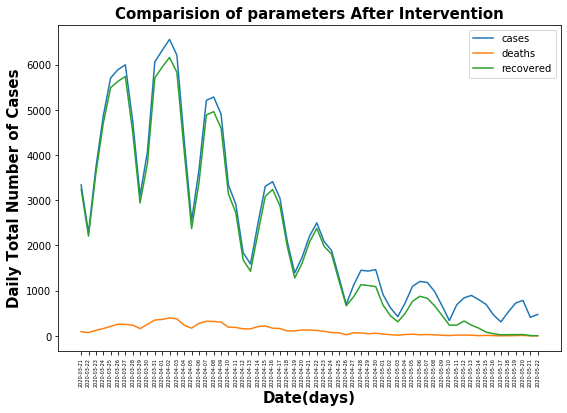

In [11]:
# Visuliaztion For daily Total Number of cases with respect to date(After intevention)

#  Read After intervention file

df = pd.read_excel('DSLPreprocessing_by_date_sum_after.xlsx')

# Plot the covid19 SIR model Parameters vs date
plt.figure(figsize=(9,6))
plt.plot(df['date'], df['cases'],label = 'cases')
plt.plot(df['date'], df['deaths'],label = 'deaths')
plt.plot(df['date'], df['recovered'],label = 'recovered')
plt.xticks(df['date'], rotation=90, size = 5)
# set label for x,y axis
plt.xlabel('Date(days)',fontdict={'fontweight':'bold', 'fontsize':15})
plt.ylabel('Daily Total Number of Cases',fontdict={'fontweight':'bold', 'fontsize':15})
plt.title('Comparision of parameters After Intervention',fontdict={'fontweight':'bold', 'fontsize':15})
plt.legend()
plt.show()

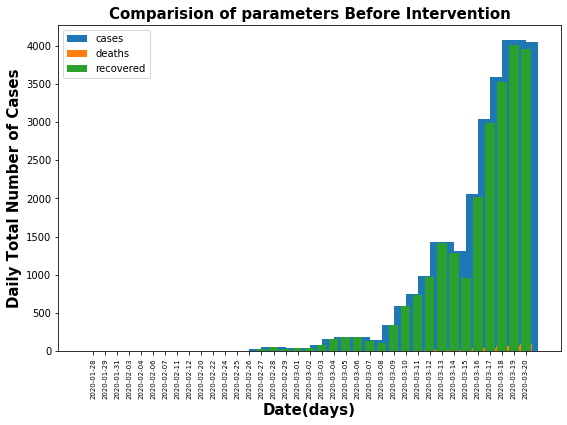

In [12]:
# Visuliaztion of barchart for all The SIR parameter's with respect to date(before intevention)
# Set directory read before data intervention file and Load into Dataframe

df = pd.read_excel('DSLPreprocessing_by_date_sum_before.xlsx')
# Plot the covid19 SIR model Parameters vs date
plt.figure(figsize=(9,6))
plt.bar(df['date'], df['cases'], label = 'cases', width = 2)
plt.bar(df['date'], df['deaths'],label = 'deaths', width = 1)
plt.bar(df['date'], df['recovered'], label = 'recovered')
plt.xticks(df['date'], rotation=90, size = 7)
# set label for x,y axis
plt.xlabel('Date(days)',fontdict={'fontweight':'bold', 'fontsize':15})
plt.ylabel('Daily Total Number of Cases',fontdict={'fontweight':'bold', 'fontsize':15})
plt.title('Comparision of parameters Before Intervention', fontdict={'fontweight':'bold', 'fontsize':15})
plt.legend()
plt.show()

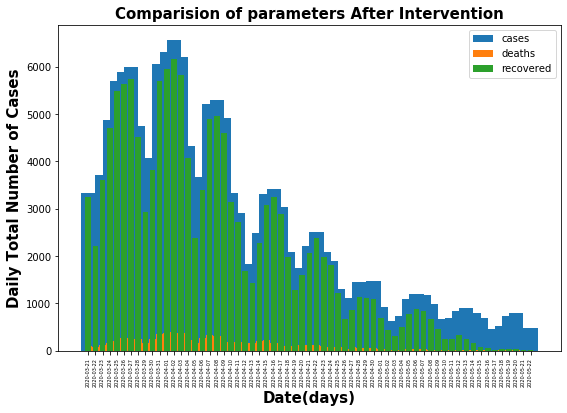

In [13]:
# Visuliaztion of barchart for all The SIR parameters with respect to date(After intevention)

#  Set directory read After data intervention file and Load into Dataframe

df = pd.read_excel('DSLPreprocessing_by_date_sum_after.xlsx')

# Plot the covid19 SIR model Parameters vs date
plt.figure(figsize=(9,6))
plt.bar(df['date'], df['cases'],label = 'cases', width = 2)
plt.bar(df['date'], df['deaths'],label = 'deaths', width = 1)
plt.bar(df['date'], df['recovered'],label = 'recovered')
plt.xticks(df['date'], rotation=90, size = 5)
# set label for x,y axis
plt.xlabel('Date(days)',fontdict={'fontweight':'bold', 'fontsize':15})
plt.ylabel('Daily Total Number of Cases',fontdict={'fontweight':'bold', 'fontsize':15})
plt.title('Comparision of parameters After Intervention',fontdict={'fontweight':'bold', 'fontsize':15})
plt.legend()
plt.show()

## Model Implementation

## Adjust lockdown

In [14]:
def lockdown(contact_rate, day):
    if day > raw_parameter:
        return effective_contact_rate
    else:
        return contact_rate 

## Preprocessing again for model training

In [15]:
df1 = pd.read_excel('DSLPreprocessing_by_date_sum_before.xlsx')
df2 = pd.read_excel('DSLPreprocessing_by_date_sum_after.xlsx')

fulldf = pd.concat([df1, df2])

ydata = [i for i in fulldf.cases]
xdata = list(range(1,len(fulldf.date)+1))

ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

## Data initialization

In [16]:
N = 83000000
infected = ydata[0]
suspected = N - infected
recovered = 0.0

#effective_contact_rate = transmission_rate * contact_rate
effective_contact_rate = 0.05 * 5


raw_parameter = len(df1)
print("Effective Contact rate : ", effective_contact_rate)

Effective Contact rate :  0.25


## model fitting with lockdown parameter

In [17]:
def adjusted_sir_model(ydata, xdata, N, beta, gamma):
    
    beta = lockdown(beta, xdata)
    
    sus = -beta * ydata[0] * ydata[1] / N
    rec = gamma * ydata[1]
    inf = -(sus + rec)
    return sus, inf, rec


def fit_adjusted_odeint(x, beta, gamma):
    return integrate.odeint(adjusted_sir_model, (suspected, infected, recovered), x, args=(N, beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_adjusted_odeint, xdata, ydata)
fitted = fit_adjusted_odeint(xdata, popt[0],popt[1])

print("Beta : ",popt[0])
print("Gamma : ",popt[1])
print("R0 : ", popt[0]/popt[1])

Beta :  1.0768739388446313
Gamma :  0.8773346654974651
R0 :  1.227438036127324


## model fitting without lockdown parameter

In [18]:
def sir_model(ydata, xdata, N, beta, gamma):
    
    sus = -beta * ydata[0] * ydata[1] / N
    rec = gamma * ydata[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (suspected, infected, recovered), x, args=(N, beta, gamma))[:,1]

popt1, pcov1 =  optimize.curve_fit(fit_odeint, xdata, ydata)
not_adjusted = fit_odeint(xdata, *popt1)
print("Beta Fitted : ", popt1[0])
print("Gamma Fitted : ", popt1[1])
print("R0 : ", popt1[0]/popt1[1])

Beta Fitted :  15.00152825238755
Gamma Fitted :  14.820001447367716
R0 :  1.0122487710722914


## Visualization of trained model

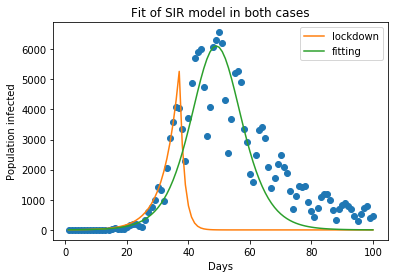

In [19]:
plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted, label = 'lockdown')
plt.legend(loc='best')
plt.plot(xdata, not_adjusted, label = 'fitting')
plt.legend(loc='best')

plt.title("Fit of SIR model in both cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()




## Network Simulation

## Graph initialization

In [20]:
graph = nx.erdos_renyi_graph(1000, 0.1)

## Model selection

In [21]:
model = ep.SIRModel(graph)

## Model configuration

In [22]:
config = mc.Configuration()
# config.add_model_parameter('beta', 0.001)
# config.add_model_parameter('gamma', 0.01)
# config.add_model_parameter("fraction_infected", 0.01)
print(popt1[0])
print(popt1[1])
config.add_model_parameter('beta', popt[0])
config.add_model_parameter('gamma', popt[1])
config.add_model_parameter("fraction_infected", 0.01)
model.set_initial_status(config)

15.00152825238755
14.820001447367716


## Simulation execution

In [24]:
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

visualization = DiffusionTrend(model, trends)
plt = visualization.plot(width=800, height=500)
show(plt)

100%|██████████| 100/100 [00:00<00:00, 204.43it/s]
